# 네이버 지식인 - 이성친구 선물 검색

## 1. 데이터 크롤링

In [35]:
from bs4 import BeautifulSoup
import pandas as pd
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from tqdm.notebook import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
from urllib.parse import quote
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'gulim'

In [36]:
options = webdriver.ChromeOptions()
options.add_argument('--headless') # 화면없이 실행
options.add_argument('--no-sandbox')
options.add_argument('--single-process')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver.exe', options=options)

In [42]:
base_url = 'https://kin.naver.com/search/list.naver?query='
url = url = base_url + quote('여친선물')
driver.get(url)

In [48]:
answer_list = []
for page in tqdm(range(1,11)):
    print('page', page)
    url = f"{base_url}{quote('여친선물')}&page={page}"
    driver.get(url)
    time.sleep(1)

    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    lis = soup.select('ul.basic1 > li')

    for li in lis:
        sub_url = li.select_one('a._searchListTitleAnchor')['href']
        driver.get(sub_url)
        time.sleep(1)

        count = int(driver.find_element(By.CSS_SELECTOR, '._answerCount.num').text)
        answer_page = (count - 1) // 5

        for i in range(answer_page):
            driver.find_element(By.ID, 'nextPageButton').click()
            time.sleep(1)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        divs = soup.select('div.answer-content__item._contentWrap._answer')

        for div in divs:
            ps = div.select('p.se-text-paragraph')
            for p in ps:
                text = p.get_text()
                if text == ' ' or text == '\u200b':
                    continue
                answer_list.append(text)
        driver.back()
        time.sleep(1)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10


In [49]:
len(answer_list)

3903

In [51]:
with open('new_gift.txt', 'w', encoding='utf-8') as fp:
    for answer in answer_list:
        fp.write(answer + '\n')

## 2. 여친선물 WC

In [55]:
with open('new_gift.txt', encoding='UTF-8') as file:
    text = file.read()

In [56]:
from konlpy.tag import Okt

In [57]:
# 명사 추출
tokens = okt.nouns(text)

In [58]:
print(tokens[:30])

['풀잎', '문화센터', '카페', '십자수', '도안', '사용', '그림', '도안', '남친', '십자수', '것', '여자친구', '분', '생일', '선물', '제품', '고민', '제', '실제', '남친', '일주일', '사랑', '영화', '교환일기', '추천', '여친', '번갈아', '가면', '질문', '답']


* 영문자, 숫자, 부호 제거

In [60]:
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [61]:
import nltk

* 다음의 두 과정을 반복해서 불용어를 정리

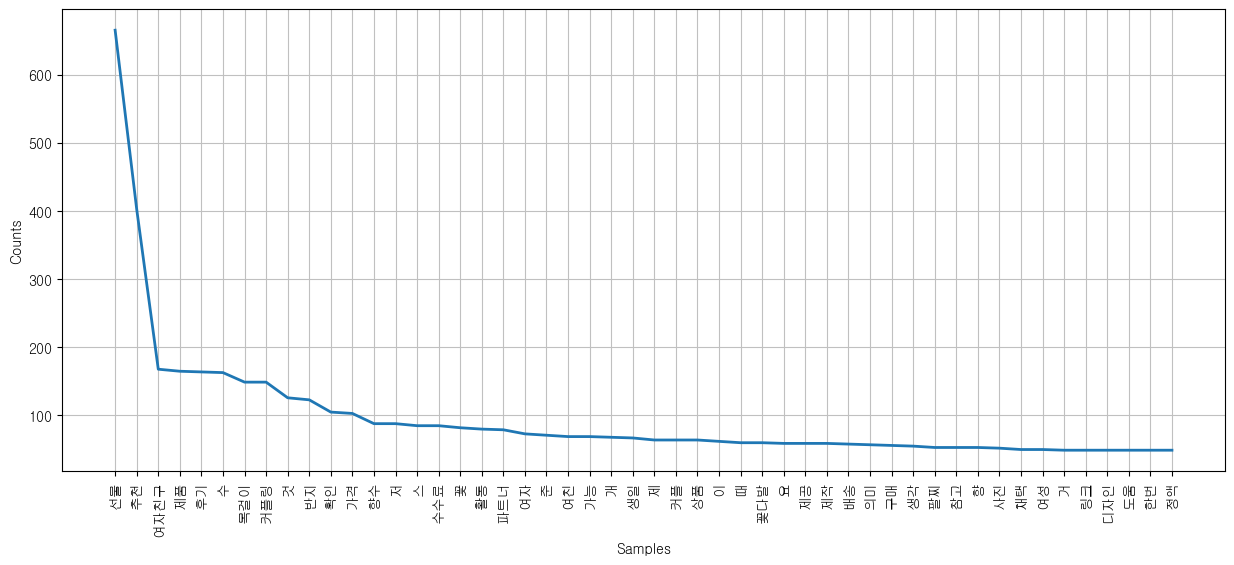

In [62]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [124]:
stoptext = '''
    선물 추천 여자친구 제품 수 것 확인 가격 저 스 수수료 활동 파트너 여자 준 가능 개
    생일 제 커플 상품 이 때 요 제공 제작 배송 의미 구매 생각 참고 향 채택 여성 거
    링크 디자인 도움 한번 정액 후기 여친 더 브랜드 등 네이버 가지 인기 답변 통해 하트
    용 분 주문 가성 비 고급 마감 세트 위 기념일 고민 사용 가요 날 쿠팡 핸드 변경 질문
    부담 정말 안쪽 남자 감동 사이트 요즘 중 친구 하나 그냥 남녀 판매 직접 아래 블로그 
    포장 각인 처리 이니셜 바로 구성 가장 곳 드라마 협찬 맞춤 정도 너 사이즈 스토어 무광
    일환 마음 여기 미만 로 심플 유광 풍선 사랑 중 인테리어 이벤트 할인 취향 기부 조금 이면
    블라썸 평이 인터넷 시 해 제일 다른 포스팅 아이템 순 듯 종류 좀 로티 그 다음 보시 사람
    도 에어 템 순위 바로가기 핑크 크리스마스 끝 지금 남자친구 데이트 무료 자 평 복부 몇개
    보통 감성 풀잎 문화센터 카페 도안 남친 실제 일주일 영화 번갈아 가면 답 문답 컷 번 앞쪽
    몇 장 나머진 골 크림 무난 부모님 더욱 전 일정 저희 아주 끈 라면 느낌 디 퓨저 향기 옵션
    혹시 배 발렌타인데이 색상 나가시 아침 담날 랩 또 준비 기본 스타일 후원 구경 열기 데 드릴
    피부 나 다이슨 검색 물건 진짜 강 추강 경우 착용 하루 큐빅 유리 진짜 추가 보고 소재 세공
    문의 센스 오늘 세상 선택 쇼핑 걸 미니 방향 재질 쇼핑몰 분위기 캐리커쳐 문구 때문 모양
    꼭 건 포인트 나이 보기 고객 하바 리움 축하 컬러
    '''

In [125]:
stop_words = stoptext.split()
tokens = [token for token in tokens if token not in stop_words]

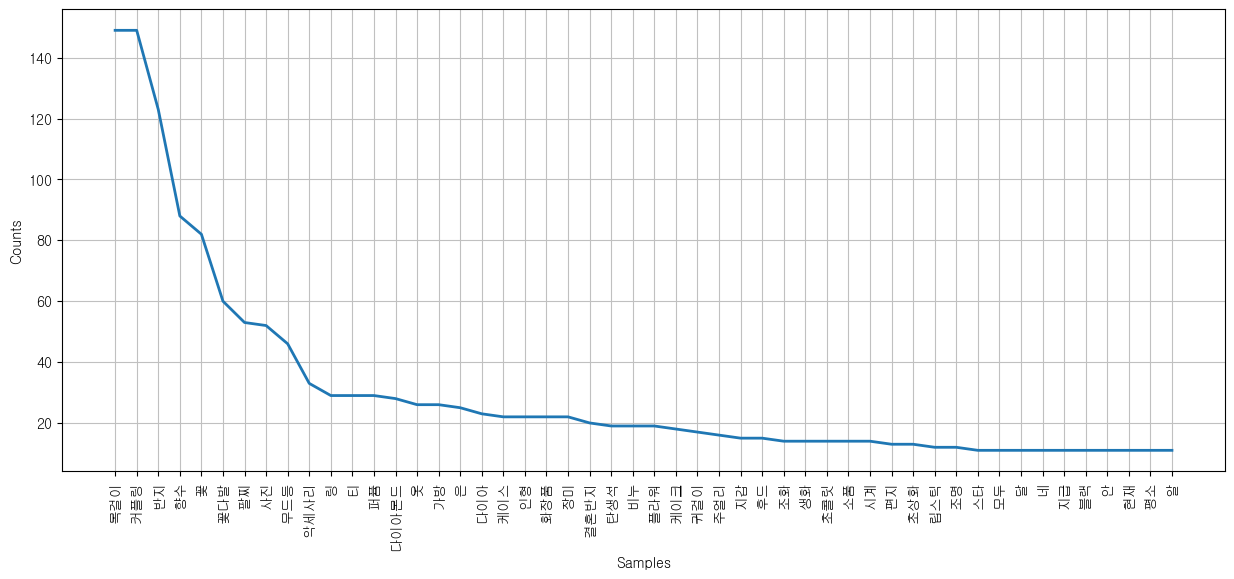

In [126]:
gift = nltk.Text(tokens, name = '여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [117]:
tokens[:10]

['십자수', '그림', '십자수', '교환일기', '교환일기', '앨범', '사진', '진짜', '강', '추강']

## 3. 워드클라우드 그리기

In [105]:
from wordcloud import WordCloud
from PIL import Image

In [135]:
data = gift.vocab().most_common(300)
font_path = 'C:\Windows\Fonts\gulim'

In [136]:
wc = WordCloud(font_path, relative_scaling=0.2, 
               background_color='white').generate_from_frequencies(dict(data))

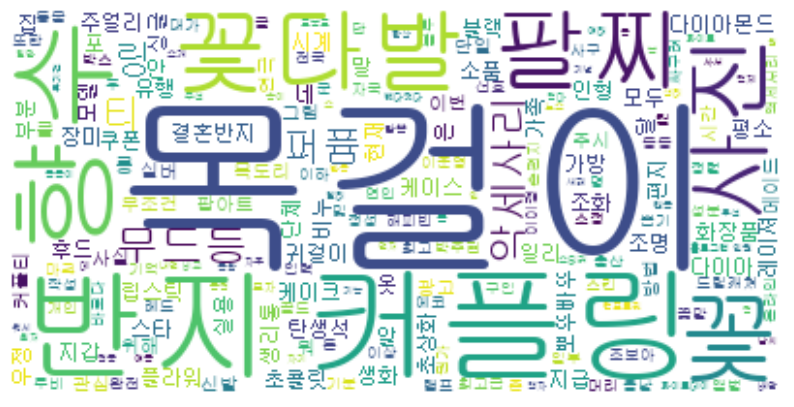

In [137]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

* 하트에 표시

In [128]:
import numpy as np

In [139]:
mask = np.array(Image.open('heart.jpg'))

In [140]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [141]:
wc = WordCloud(font_path, relative_scaling=0.2, 
               background_color='white', 
               mask=mask, min_font_size=1, 
               max_font_size=120).generate_from_frequencies(dict(data))

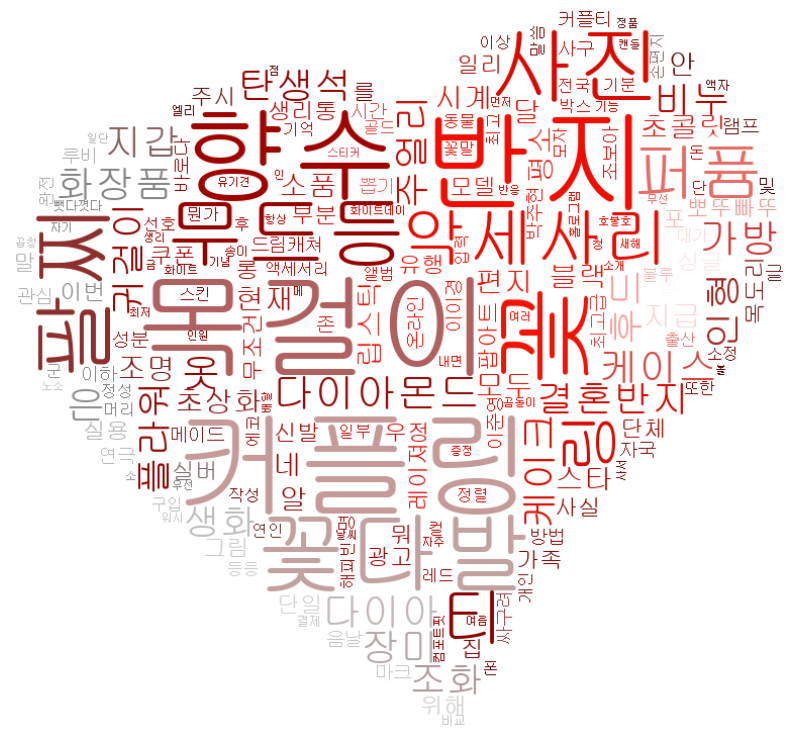

In [142]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()